## Segmentação de Clientes

> Neste trabalho, usaremos o banco de dados da Olist com K-means para identificar a frequência, recência e receita dos consumidores e agrupá-los em categorias de compras. Assim, podemos fazer campanhas de marketing específicas, além de criar programas de recompensas para os clientes que mais consomem.

## Base da empresa alura
https://github.com/rafaelgildin/Client-Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
import math

In [2]:
df = pd.read_csv('BancoDeDados.csv')
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

## Análise Exploratória

In [4]:
def plot_perc(st, dados):
    plt.figure(figsize = (20,8))
    
    g = sns.countplot(x= st, data = dados, orient = 'h', 
                      order = dados[st].value_counts().index)
    g.set_ylabel('Contagem', fontsize = 17)
    
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6,
               height+200, 
               '{:1.2f}%'.format(height/116581 * 100),
               ha = 'center', va = 'bottom', fontsize = 12)
    
    g.set_ylim(0, max(sizes)*1.1)

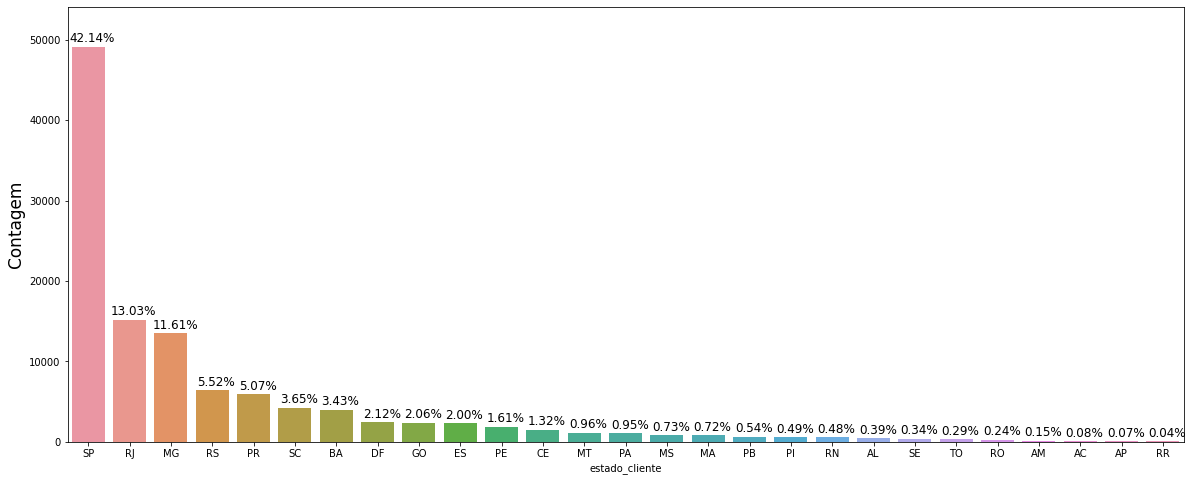

In [5]:
plot_perc('estado_cliente', df)

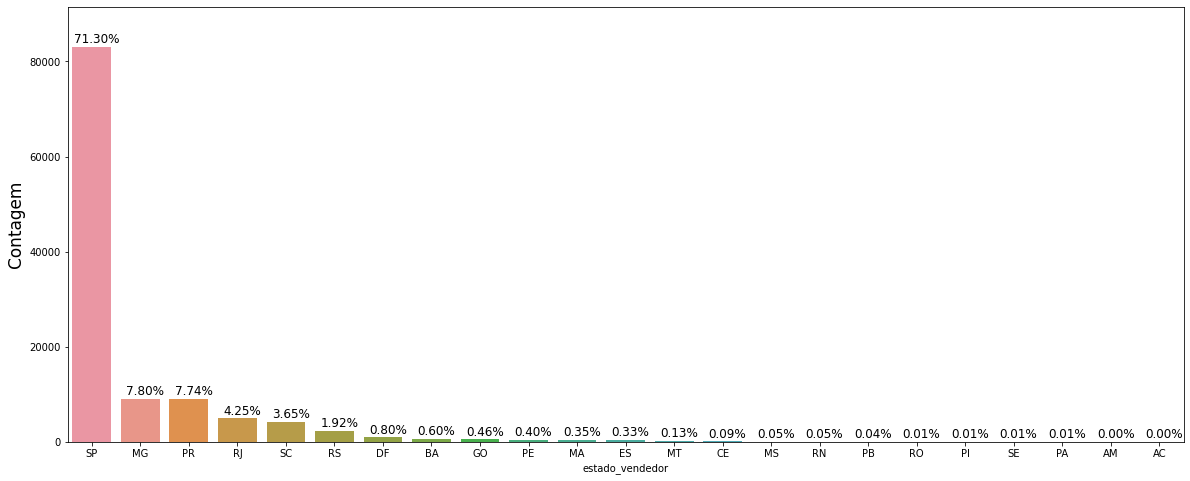

In [6]:
plot_perc('estado_vendedor', df)

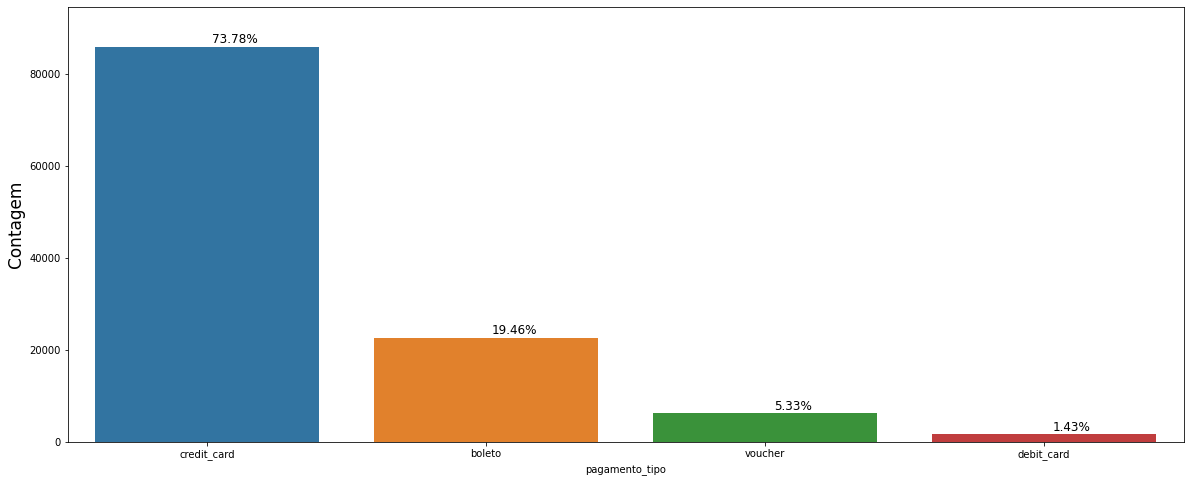

In [7]:
plot_perc('pagamento_tipo', df)

### Preço médio por estado

[]

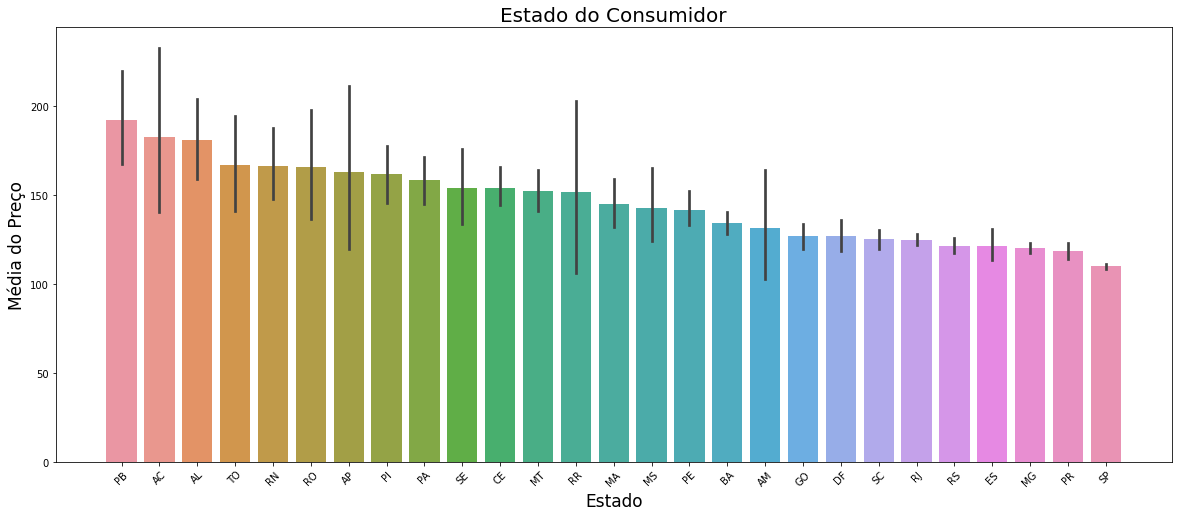

In [8]:
plt.figure(figsize=(20,8))
g2 = sns.barplot(x='estado_cliente', y='preco',
                 data=df[df['preco'] > 0], 
                 order = df.groupby('estado_cliente').mean()['preco'].sort_values(ascending = False).index)
g2.set_title("Estado do Consumidor", fontsize=20)
g2.set_xlabel("Estado", fontsize=17)
g2.set_ylabel("Média do Preço", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.plot()

<AxesSubplot:xlabel='estado_cliente'>

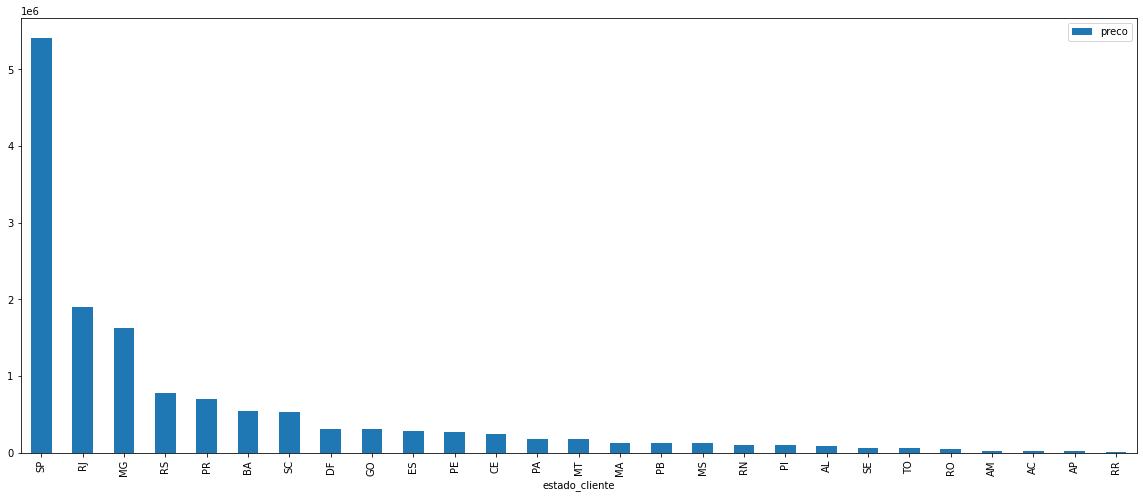

In [9]:
estado_preco = df[['estado_cliente', 'preco']].groupby('estado_cliente').sum().sort_values(by='preco', ascending = False)
estado_preco.plot(kind = 'bar', figsize = (20, 8))

### Frete por estado

[]

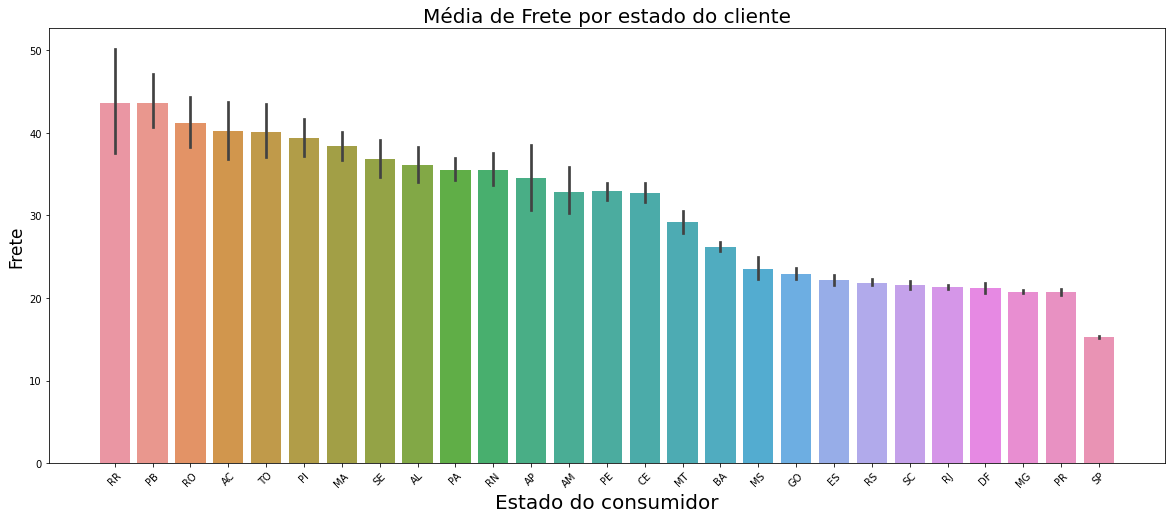

In [10]:
plt.figure(figsize = (20,8))
g3 = sns.barplot(x = 'estado_cliente', y = 'frete',
                 data = df[df['frete'] > 0],
                 order = df.groupby('estado_cliente').mean()['frete'].sort_values(ascending = False).index)
g3.set_title("Média de Frete por estado do cliente", fontsize = 20)
g3.set_xlabel('Estado do consumidor', fontsize = 20)
g3.set_ylabel('Frete', fontsize = 17)
g3.set_xticklabels(g3.get_xticklabels(), rotation = 45)
g3.plot()

<AxesSubplot:xlabel='estado_cliente'>

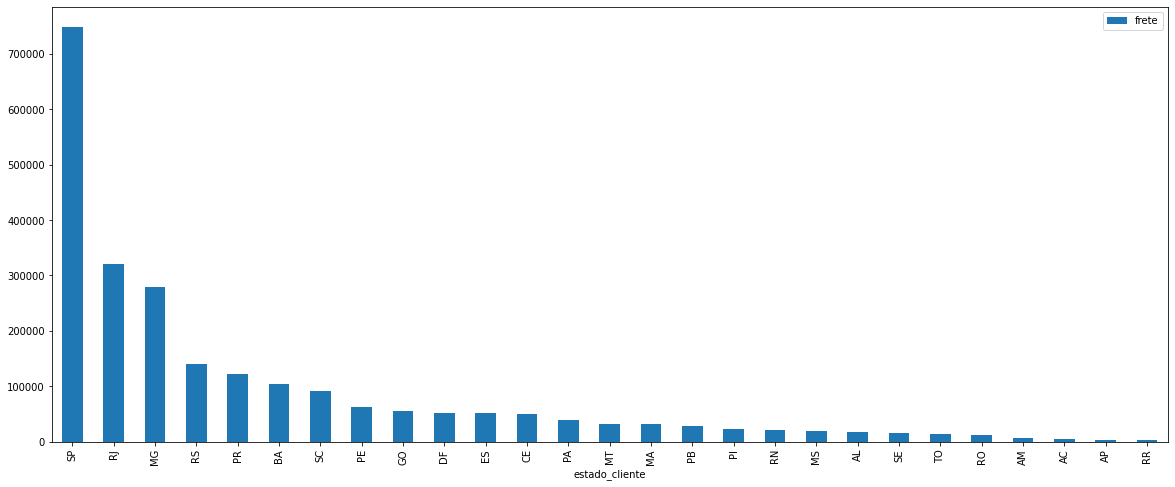

In [11]:
estado_frete = df[['estado_cliente', 'frete']].groupby('estado_cliente').sum().sort_values(by = 'frete', ascending = False)
estado_frete.plot(kind = 'bar', figsize = (20, 8))

### Mapa de Calor : estado do vendedor

In [12]:
def mapa_calor(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, 
                       aggfunc=aggfunc).style.background_gradient(cmap = cm)

# Criar a coluna regiao_cliente
df['regiao_cliente'] = df.estado_cliente.copy()

# agrupar os estados por região
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

# Imputar os dados na coluna 'regiao_cliente' de acordo com o estado na coluna 'estado_cliente'
df.loc[df['estado_cliente'].isin(sudeste), 'regiao_cliente'] = 'Sudeste'
df.loc[df['estado_cliente'].isin(nordeste), 'regiao_cliente'] = 'Nordeste'
df.loc[df['estado_cliente'].isin(norte), 'regiao_cliente'] = 'Norte'
df.loc[df['estado_cliente'].isin(centro_oeste), 'regiao_cliente'] = 'Centro Oeste'
df.loc[df['estado_cliente'].isin(sul), 'regiao_cliente'] = 'Sul'

# Plotar o mapa de calor
mapa_calor(df[df['preco'] != -1], ['estado_vendedor', 'regiao_cliente'], 
           values=df[df['preco'] != -1]['frete'], aggfunc='mean')


regiao_cliente,Centro Oeste,Nordeste,Norte,Sudeste,Sul
estado_vendedor,,,,,
AC,nan,nan,nan,32.840000,nan
AM,nan,28.255000,nan,25.290000,nan
BA,29.977381,22.736355,46.290476,33.618110,39.643671
CE,65.456667,29.744054,85.614000,47.044130,51.445556
DF,13.022231,27.532778,58.371935,19.654101,27.076867
ES,36.895833,38.183269,60.022857,28.753852,39.894510
GO,14.573721,33.369841,26.595909,23.764630,30.426667
MA,27.150192,19.453333,28.859000,31.880362,42.660652
MG,26.980406,34.144730,41.923133,21.278114,28.976495


- Identificamos primeiramente que a maioria dos clientes realiza compras por cartão de crédito, posteriormente por boleto, voucher e cartão de débito. Seria interessante aumentar as promoções para pagamento à vista (para aumento dos pagamentos com boleto ou cartão de débito).
- Também percebe-se que a maioria dos vendedores e compradores estão em SP.

> Agora que temos um banco de dados completo, podemos salvá-lo para utilizá-lo posteriormente.
Também vou criar um novo banco de dados apenas com as informações que vou precisar para fazer a análise de recência, frequência e receita.

# Funções para calcular o número de clusters

In [13]:
def calcular_df_wcss(data):
    '''
    recebe um dataframe e retorna um dataframe com as colunas:
    - Clusters (contém o número de clusters usado no modelo kmeans)
    - Inércia (medida que representa o erro do modelo)
    '''
    wcss = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        wcss.append([k, kmeans.inertia_])
    wcss = pd.DataFrame(wcss, columns =  ['Clusters', 'Inercia'])
    return wcss

def plotar_wcss(dados):
    df_soma_quadrados = dados.copy()
    n_clusters_ideal = numero_otimo_clusters(df_soma_quadrados)
    plt.figure(figsize = (10,5))
    plt.plot(df_soma_quadrados['Clusters'], 
             df_soma_quadrados['Inercia'])
    plt.xlabel('Número de Clusters')
    plt.title(f'Número de Clusters ideal = {n_clusters_ideal}')
    plt.show()

def numero_otimo_clusters(dados): 
    '''
    recebe um dataframe com as colunas Clsuters e Inertia
    e retorna o número de clusters com a maior distância.
    '''
    wcss = dados.copy()
    x0, y0 = wcss.iloc[0]
    x1, y1 = wcss.iloc[-1]
    distancia = []
    for i in range(len(wcss)):
        x = wcss.loc[i, 'Clusters']
        y = wcss.loc[i, 'Inercia']
        numerador = abs((y1 - y0)*x - (x1 - x0)*y + x1*y0 - y1*x0)
        denominador = math.sqrt((y1 - y0)**2 + (x1 - x0)**2)
        distancia.append(numerador / denominador)
    wcss['distancia'] = distancia
    distancia_max = wcss['distancia'].max()
    n_clusters_ideal = int(wcss[wcss['distancia']  == distancia_max]['Clusters'])
    return n_clusters_ideal

def n_clusters_completo(dados):
    '''
    Função que recebe um dataframe, calcula e plota as inércias para diferentes números de cluster
    e retorna o número ideal de clusters.
    '''
    wcss = calcular_df_wcss(dados)
    plotar_wcss(wcss)
    n_clusters = numero_otimo_clusters(wcss)
    return n_clusters
    
def ordenador_cluster(cluster_nome, target_nome, df, ascendente):
    '''
    Inputs:
        cluster_nome : nome da coluna com os clusters
        target_name : nome da coluna usada para a clusterização
        df : conjunto de dados
    Outputs:
        df_final : conjunto de dados com a coluna dos clusters
                   ordenada.
    '''
    # Agrupar a média de target_nome por cluster
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    
    # Ordenar pela coluna target_nome
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by = target_nome, ascending = ascendente).reset_index(drop = True)
    
    # Criar a coluna index
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    
    # Colocar a coluna index e o df em um novo df
    juntando_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_nome, 'index']],on = cluster_nome)
    
    # Removendo a coluna cluster_nome
    removendo_dados = juntando_cluster.drop([cluster_nome], axis = 1)
    
    # Renomeando a coluna index
    df_final = removendo_dados.rename(columns={'index':cluster_nome})
    
    return df_final

> ## Recência (R)
**Há quantos dias foi a última compra deste cliente ?**

> ## Frequência (F)
**Quantas compras esse cliente já fez na sua empresa, desde que se cadastrou ?**

> ## Monetariedade (M)
**Quanto esse cliente já gastou em dinheiro na sua empresa ?**

# Recência

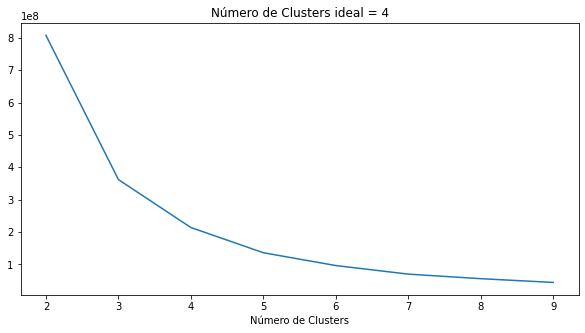

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20524.0,489.787907,59.600038,405.0,443.0,481.0,532.0,728.0
1,30757.0,319.404298,43.691600,254.0,281.0,313.0,356.0,404.0
2,33712.0,187.293338,35.169771,127.0,158.0,187.0,218.0,253.0
3,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0


In [14]:
# criar uma nova base
df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

# df com o id do cliente e o horário da última compra
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
# Renomear as colunas
df_compra.rename(mapper={'horario_pedido':'DataMaxCompra'}, axis = 1,
                inplace = True)
# Transformar a coluna 'DataMaxCompra' em datetime
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])
# Cria a coluna Recência no df_compra
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - 
                         df_compra['DataMaxCompra'] ).dt.days

# Cria uma nova base, unindo o df_olist e o df_compra
df_usuario = pd.merge(df_olist, 
                      df_compra[['id_unico_cliente', 'Recencia']],
                      on = 'id_unico_cliente')

# Criar o df_recencia
df_recencia = df_usuario[['Recencia']]

# pegar o número ideal de clusters
n_clusters_recencia = n_clusters_completo(df_recencia)

# Clusterizar a Recência
kmeans = KMeans(n_clusters = n_clusters_recencia)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

# Ordenar o clusters como sendo inversamente proporcional -> quanto menor a recência, maior será o cluster (pontuação)
df_usuario = ordenador_cluster('RecenciaCluster', 'Recencia', df_usuario, False)

# Confirmar a ordem dos clusters : relação inversamente proporcional (coluna 'mean'  ok)
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

# Frequência

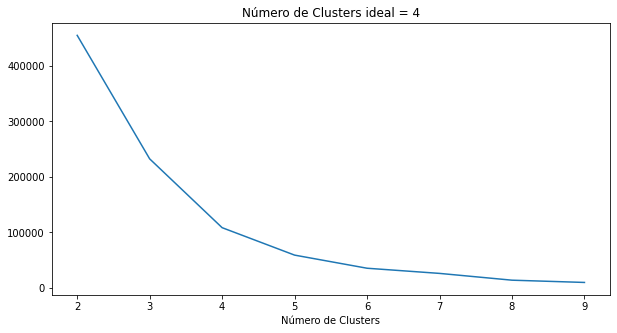

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9422.0,5.848015,2.496369,4.0,4.0,5.0,6.0,15.0
2,514.0,24.447471,5.669776,16.0,20.0,24.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [15]:
# Criar o df_frequencia
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
# Renomear as colunas
df_frequencia.rename(columns = {'pedido_aprovado' : 'Frequencia'}, inplace=True)
# Unir o df_frequencia ao df_usuario
df_usuario = pd.merge(df_usuario, df_frequencia, on = 'id_unico_cliente')

df_frequencia = df_usuario[['Frequencia']]
# pegar o número ideal de clusters
n_clusters_frequencia = n_clusters_completo(df_frequencia)

# Clusterizar a frequência
kmeans = KMeans(n_clusters = n_clusters_frequencia)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)

# Ordenar os clusters (diretamente proporcional : True)
df_usuario = ordenador_cluster('FrequenciaCluster', 'Frequencia', df_usuario, True)

# Ver se está tudo ok
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

# Monetariedade

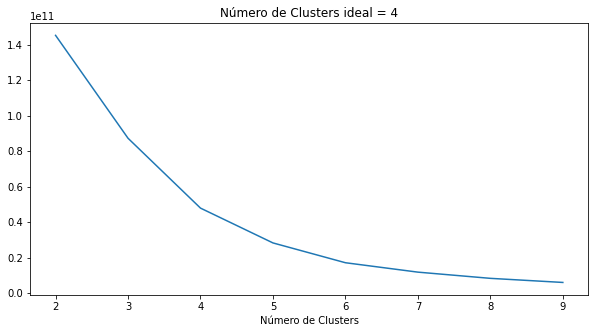

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [16]:
# Criar o df_monetariedade
df_monetariedade = df.groupby('id_unico_cliente')['pagamento_valor'].sum().reset_index()
# Renomear as colunas
df_monetariedade.rename(columns = {'pagamento_valor': 'Receita'}, inplace = True)
# Unir df_monetariedade e df_usuario
df_usuario = pd.merge(df_usuario, df_monetariedade, on = 'id_unico_cliente')

# Criar o df_monetariedade
df_monetariedade = df_usuario[['Receita']]
# pegar o número ideal de clusters
n_clusters_monetariedade = n_clusters_completo(df_monetariedade)

# Clusterizar o df_monetariedade
kmeans = KMeans(n_clusters = n_clusters_monetariedade)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_monetariedade)

# Ordenar os clusters (diretamente proporcional : True)
df_usuario = ordenador_cluster('ReceitaCluster', 'Receita', df_usuario, True)

# Verificar: quanto maior a receita maior será o cluster (pontuação) -> coluna 'mean'
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

# Criar uma pontuação

In [17]:
import sys
import warnings

# Evitar mensagens de erro no notebook
if not sys.warnoptions:
    warnings.simplefilter('ignore')
    
# Criar o df_final
df_final = df_usuario[['id_unico_cliente', 'Recencia', 'RecenciaCluster',
                       'Frequencia', 'FrequenciaCluster', 'Receita',
                       'ReceitaCluster']]

# Criar a  coluna 'Pontuacao' no df_final
df_final['Pontuacao'] = (df_usuario['RecenciaCluster'] + 
                         df_usuario['FrequenciaCluster'] + 
                         df_usuario['ReceitaCluster'])

# Criar a coluna 'Segmento' de acordo com a coluna 'Pontuacao'
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao'] >= 1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao'] >= 3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao'] >= 5, 'Segmento'] = 'Premium'

# Salvar como um arquivo csv
df_final.to_csv('RFM.csv')

df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0,Inativo
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0,Inativo
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0,Inativo
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0,Inativo
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0,Inativo


# Analisando os features

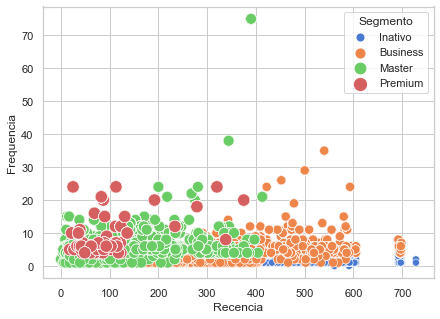

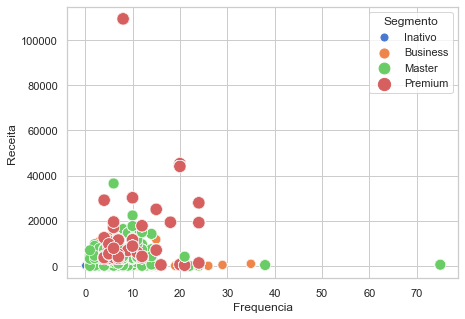

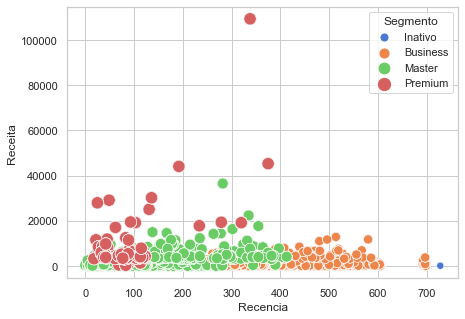

<AxesSubplot:xlabel='Segmento', ylabel='count'>

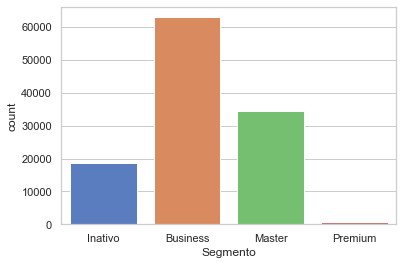

In [18]:
def plot_segmento(x, y, data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize = (7,5))
    sns.scatterplot(x = x, y = y, hue = 'Segmento', data = data, size = 'Segmento',
                   sizes = (50,150), size_order = ['Premium', 'Master', 'Business', 'Inativo'])
    plt.show()
    
plot_segmento('Recencia', 'Frequencia', df_final)
plot_segmento('Frequencia', 'Receita', df_final)
plot_segmento('Recencia', 'Receita', df_final)
sns.countplot(df_final['Segmento'])